# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [3]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

schema_df=pd.read_csv('schema.csv')
schema_df.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [5]:
data_df=pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
data_df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_df.FormalEducation.value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

In [23]:
columns_to_keep=["AdjustedCompensation","FormalEducation"]
for column in data_df:
    if column in columns_to_keep:
        pass
    else:
        data_df.drop(column, axis=1, inplace=True)

In [33]:
data_df.head()

,FormalEducation,AdjustedCompensation
0,Bachelor's degree,NaN
1,Master's degree,NaN
2,Master's degree,NaN
3,Master's degree,250000.0
4,Doctoral degree,NaN


In [43]:
#Your code here
#H0: There is no difference between degrees. Bachelor's salary = Master's salary
#H1: There is a difference between degrees. Bachelor's salary != master's salary

masters=[]
bachelors=[]
for row in range(len(data_df)):
    if data_df.AdjustedCompensation[row]>0:
        if data_df.FormalEducation[row]=="Bachelor's degree":
            bachelors.append(data_df.AdjustedCompensation[row])
        elif data_df.FormalEducation[row]=="Master's degree":
            masters.append(data_df.AdjustedCompensation[row])
        else:
            pass
    else:
        pass

masters=np.array(masters)
bachelors=np.array(bachelors)

len(masters), len(bachelors)

(1969, 1099)

In [45]:
import scipy.stats as stats
t,p=stats.ttest_ind(masters,bachelors,equal_var=False)
print(f"t = {t}, p={p}")

t = 0.46177351618704626, p=0.644318624812539


For an alpha of 0.05, we cannot reject the null hypothesis.  It appears that people with master's degrees and people with bachelor's degrees do not have different salaries.  However, the data may need cleaned so let's check out what the distribution looks like.

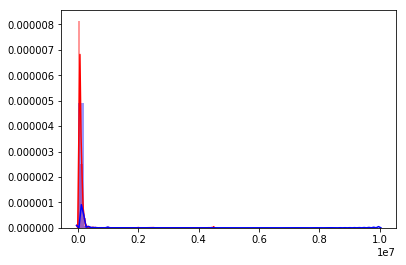

In [46]:
import seaborn as sns
sns.distplot(masters,color="red")
sns.distplot(bachelors,color="blue")

There are definitely some outliers.  I'm going to calculate the interquartile range for each set and remove anything that's more than 1.5xIQR away from the middle 50%.

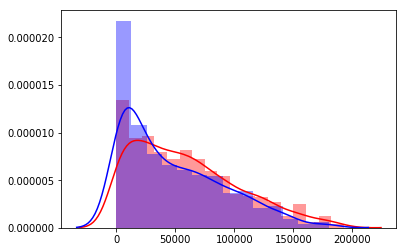

In [55]:
masters_IQR=float(pd.DataFrame(masters).quantile(0.75)-pd.DataFrame(masters).quantile(0.25))
masters_upper_bound=float(pd.DataFrame(masters).quantile(0.75))+1.5*masters_IQR
cleaned_masters=[x for x in masters if x<masters_upper_bound]

bachelors_IQR=float(pd.DataFrame(bachelors).quantile(0.75)-pd.DataFrame(bachelors).quantile(0.25))
bachelors_upper_bound=float(pd.DataFrame(bachelors).quantile(0.75))+1.5*bachelors_IQR
cleaned_bachelors=[x for x in bachelors if x<bachelors_upper_bound]

sns.distplot(cleaned_masters,color='red')
sns.distplot(cleaned_bachelors,color='blue')

In [58]:
import scipy.stats as stats
t,p=stats.ttest_ind(cleaned_masters,cleaned_bachelors,equal_var=False)
print(f"t = {t}, p={p}")

t = 6.780231599262183, p=1.5221897779664515e-11


Removing the outliers makes a huge difference.  The p-value has dropped to near 0 which means that we can reject the null hypothesis that the degree doesn't make a difference in salary.

In [63]:
pooled=cleaned_masters+cleaned_bachelors
d=(np.array(cleaned_masters).mean()-np.array(cleaned_bachelors).mean())/np.array(pooled).std()
d

0.25410574629333565

Cohen's d indicates that, though there is a difference between the groups, it's relatively small.

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [64]:
#Your code here
doctors=[]
for row in range(len(data_df)):
    if data_df.AdjustedCompensation[row]>0:
        if data_df.FormalEducation[row]=="Doctoral degree":
            doctors.append(data_df.AdjustedCompensation[row])
        else:
            pass
    else:
        pass

doctors=np.array(doctors)
len(doctors)

962

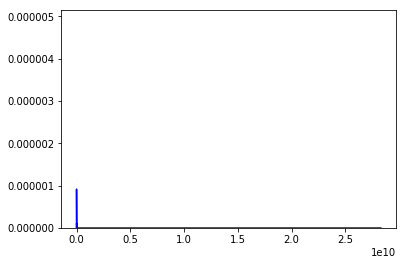

In [65]:
sns.distplot(doctors,color="red")
sns.distplot(bachelors,color="blue")

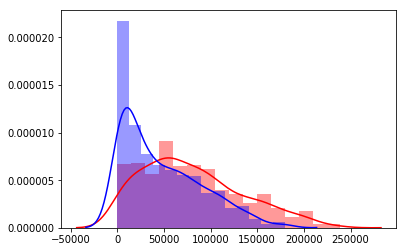

In [67]:
doctors_IQR=float(pd.DataFrame(doctors).quantile(0.75)-pd.DataFrame(doctors).quantile(0.25))
doctors_upper_bound=float(pd.DataFrame(doctors).quantile(0.75))+1.5*doctors_IQR
cleaned_doctors=[x for x in doctors if x<doctors_upper_bound]

sns.distplot(cleaned_doctors,color='red')
sns.distplot(cleaned_bachelors,color='blue');

In [68]:
t,p=stats.ttest_ind(cleaned_masters,cleaned_bachelors,equal_var=False)
print(f"t = {t}, p={p}")
pooled=cleaned_doctors+cleaned_bachelors
d=(np.array(cleaned_doctors).mean()-np.array(cleaned_bachelors).mean())/np.array(pooled).std()
d

t = 6.780231599262183, p=1.5221897779664515e-11


0.6330033118813403

In this case, p is near 0 so the null hypothesis can be rejected.  There is a difference between the salaries of the two groups.  Cohen's d is much larger in this case than in the previous one so there is a larger difference between bachelor's and doctoral degrees than there was between bachelor's and master's degrees.

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [71]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_df_cleaned=data_df[data_df['AdjustedCompensation']<doctors_upper_bound]
formula = '{} ~ C({})'.format('AdjustedCompensation','FormalEducation')
lm = ols(formula, data_df_cleaned).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  4.214839e+11     6.0  27.833887  8.892866e-33
Residual            1.074132e+13  4256.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!